***Exploración y limpieza de datos***

In [1]:
import pandas as pd

url = '/workspaces/JLL_machine-learning-python-template/data/raw/url.csv'

data = pd.read_csv(url, sep=",") 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

*Eliminamos información irrelevante*

In [2]:
data.drop(["host_name","name", "id", "last_review","reviews_per_month", "calculated_host_listings_count", "host_id"], axis = 1, inplace = True)

*Eliminamos los valores 0 y las estancias de mas de 365 días ya que las consideraremos errores*

In [3]:
data.drop(data[(data['price'] == 0)].index, inplace=True)
data.drop(data[(data['minimum_nights'] >= 365)].index, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48841 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  48841 non-null  object 
 1   neighbourhood        48841 non-null  object 
 2   latitude             48841 non-null  float64
 3   longitude            48841 non-null  float64
 4   room_type            48841 non-null  object 
 5   price                48841 non-null  int64  
 6   minimum_nights       48841 non-null  int64  
 7   number_of_reviews    48841 non-null  int64  
 8   availability_365     48841 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 3.7+ MB


***Análisis de las variables univariantes***

*Categóricas*

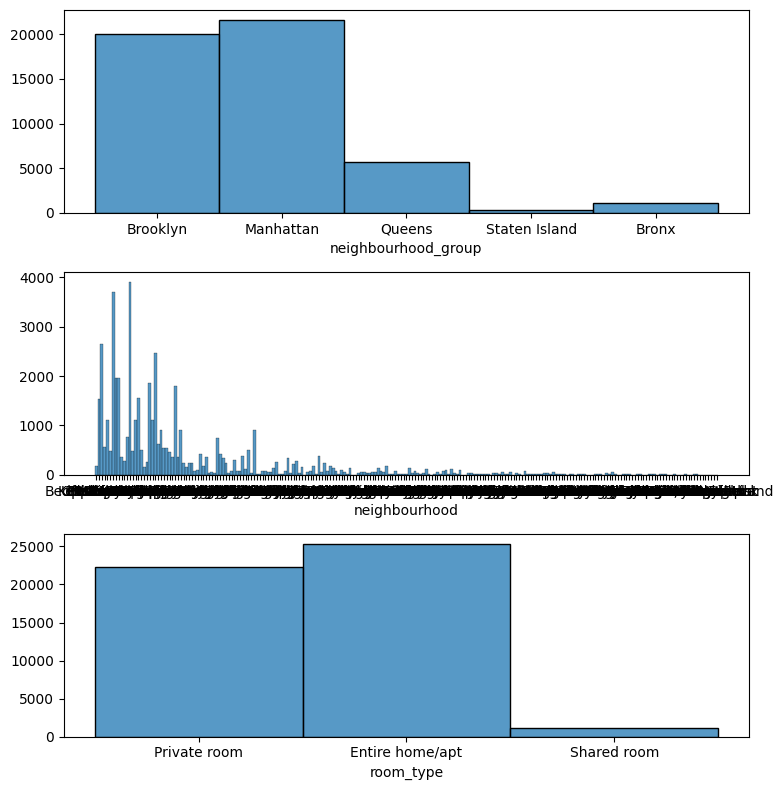

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, 1, figsize = (8, 8))

sns.histplot(ax = axis[0], data = data, x = "neighbourhood_group").set(ylabel = None)
sns.histplot(ax = axis[2], data = data, x = "room_type").set(ylabel = None)
sns.histplot(ax = axis[1], data = data, x = "neighbourhood").set(ylabel = None)

plt.tight_layout()
plt.show()

Podemos observar en la varibale de barrios, que la gran mayoría se concentran entre Manhattan y Brooklyn sin dejar de perder los datos de Queens que también son significativos. Por otro lado, entendemos que tanto el Bronx como Staten Island no son tan atractivos quizá por la distancia al centro nuerágico de la ciudad o por la seguridad de los propios barrios.
Por otro lado, en el tipo de alojamiento, vemos como los datos se reparten entre las habitaciones privadas y los apartamentos o estudios enteros. Las habitaciones compartidas queda en un segundo plano con unos datos que no llegan a ser significantes.

*Numéricas*

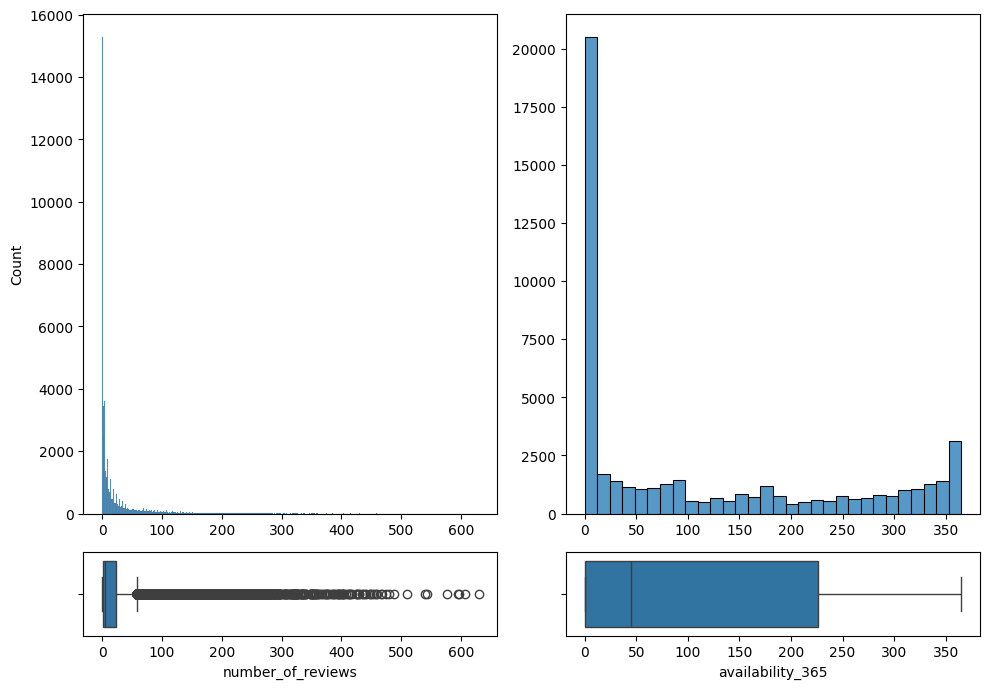

In [5]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis[0, 0], data = data, x = "number_of_reviews").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "number_of_reviews")
sns.histplot(ax = axis[0, 1], data = data, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "availability_365")

plt.tight_layout()
plt.show()

Podemos observar en la variante de número de reselas, que la gran mayoría de los alojamientos no dispone de ninguna reseña, claramente el número de reseñas va en relación inversa al número de alojamientos, por lo que podemos observar que no es una variante interesante de analizar, ya que además, no disponemos de más información y no podemos saber si son positivas o negativas.
Algo más interesante es la variable de la disponibilidad. Podemos ver cómo casi la mitad de los alojamientos no tienen ninguna disponibilidad por lo que sería interesante ver aquí la relación con el barrio y el precio. Las diferentes medidas son bantantes heterogéneas y si podemos resaltar que hay más de 2500 alojamientos que no se ha reservado ni un día del año.

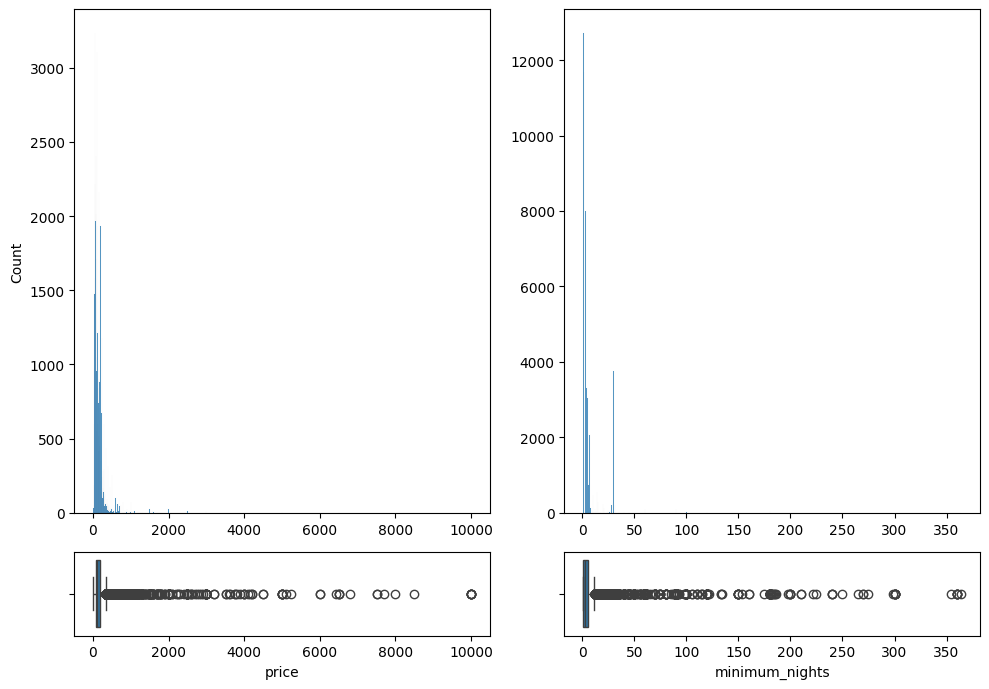

In [6]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis[0, 0], data = data, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "price")
sns.histplot(ax = axis[0, 1], data = data, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "minimum_nights")

plt.tight_layout()
plt.show()

Aquí podemos ver la variante del precio y la de las noches mínimas. El precio va a ser el dato más relevante que nos interese obtener, por tanto analizaremos todos los datos. si bien es cierto que la mayoría de precios por noche no superan los 200€ aprox, los outlieres que obtenemos pueden ser significativos, ya que perdemos la vista de otros datos interesantes como podrían ser el número de habitaciones, m2,... Aún así, utilizaremos esta variable como nuestra columna predictora para evaluar las preguntas a través del precio. La variable del número mínimo de noches no nos arroja ninguna relación interesante, si bien es cierto que situamos el final del 4 cuartil en un número muy bajo, por lo que vemos que la gran mayoría se tratan de alojamientos de estancias cortas.

***Análisis de variables multivariante***

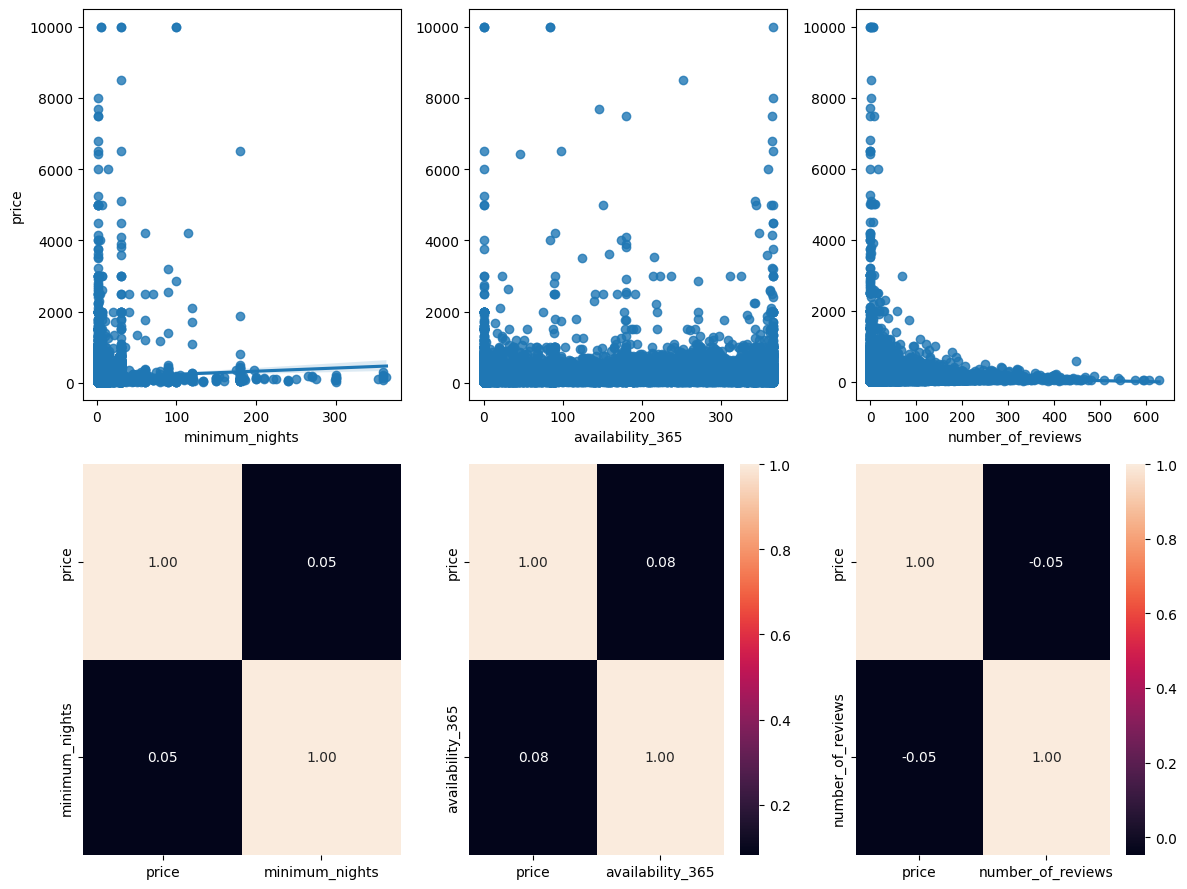

In [7]:
fig, axis = plt.subplots(2, 3, figsize = (12, 9))

sns.regplot(ax = axis[0, 0], data = data, x = "minimum_nights", y = "price")
sns.heatmap(data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data, x = "availability_365", y = "price").set(ylabel=None)
sns.heatmap(data[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[0, 2], data = data, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])


plt.tight_layout()
plt.show()

Analizamos la relación de las variables poniendo en foco con el precio y aquí es donde nos damos cuenta que los datos no son muy esperanzadores, no vemos ninguna relacón entre ellos y seguimos sin sacar conclusiones claras de hacia donde pueden ir las tendencias.

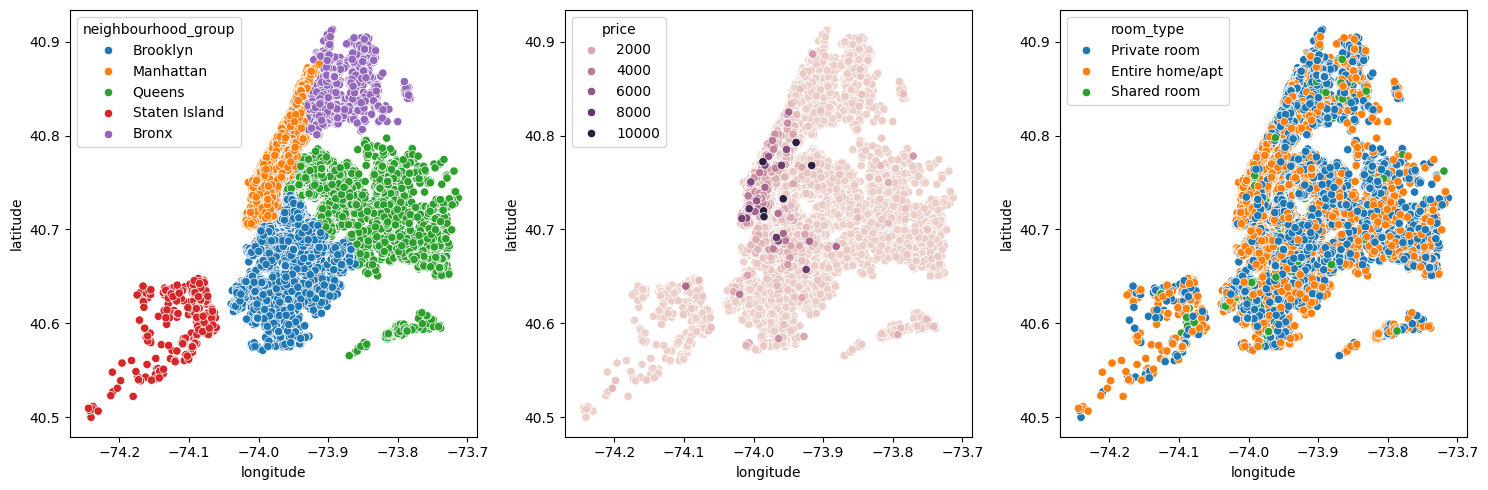

In [8]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

data_sorted = data.sort_values(by='price')

sns.scatterplot(ax = axis[1], data = data_sorted, x = "longitude", y = "latitude", hue = "price")
sns.scatterplot(ax = axis[0], data = data, x = "longitude", y = "latitude", hue = "neighbourhood_group")
sns.scatterplot(ax = axis[2], data = data, x = "longitude", y = "latitude", hue = "room_type")

plt.tight_layout()
plt.show()



Un punto importante y visual es ver la relación entre la ubicación exacta y las distintas variables. Así, primero determinamos los distritos para situar el mapa, luego vemos la relación con el precio de los alojamientos ordenados para ver alguna idea y podemos cerciorarnos de que a priori la zona con precios más altos es Manhattan. Por otro lado, intentamos relacionarlos con el tipo de alojamiento pero como podemos ver no existe relación alguna

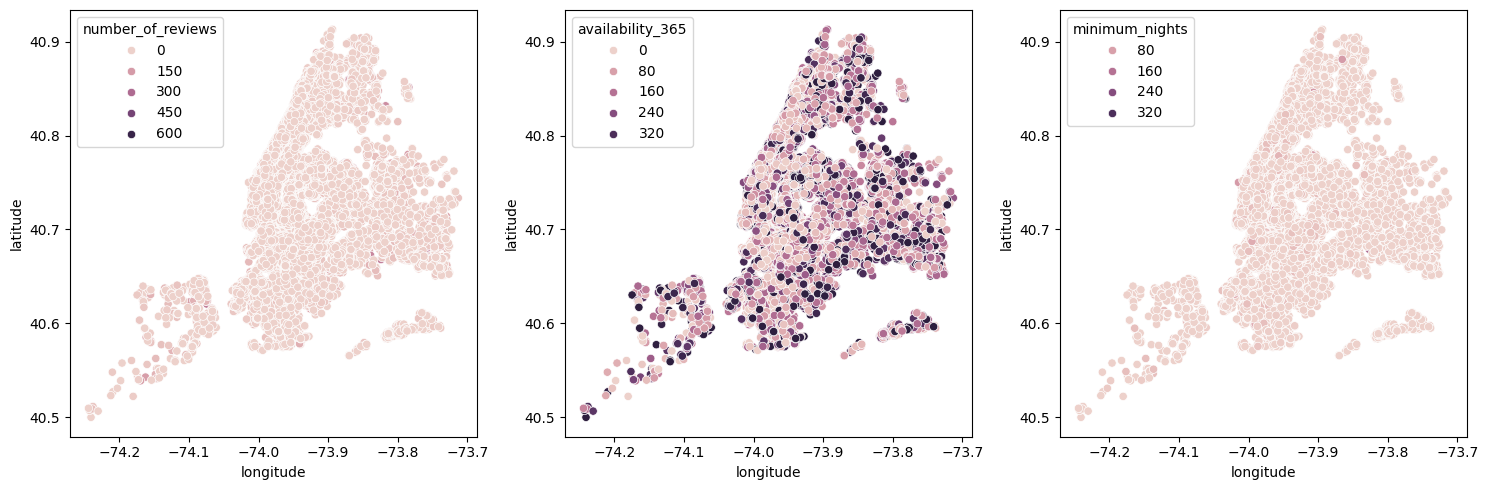

In [9]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[1], data = data, x = "longitude", y = "latitude", hue = "availability_365")
sns.scatterplot(ax = axis[0], data = data, x = "longitude", y = "latitude", hue = "number_of_reviews")
sns.scatterplot(ax = axis[2], data = data, x = "longitude", y = "latitude", hue = "minimum_nights")

plt.tight_layout()
plt.show()

Terminamos de graficar las ubicaciones con las reseñas, la disponibilidad y el mínimo de noches. Sin éxito de nuevo, vemos como los datos se repartes sin seguir ningún patrón que nos pueda esclarecer.

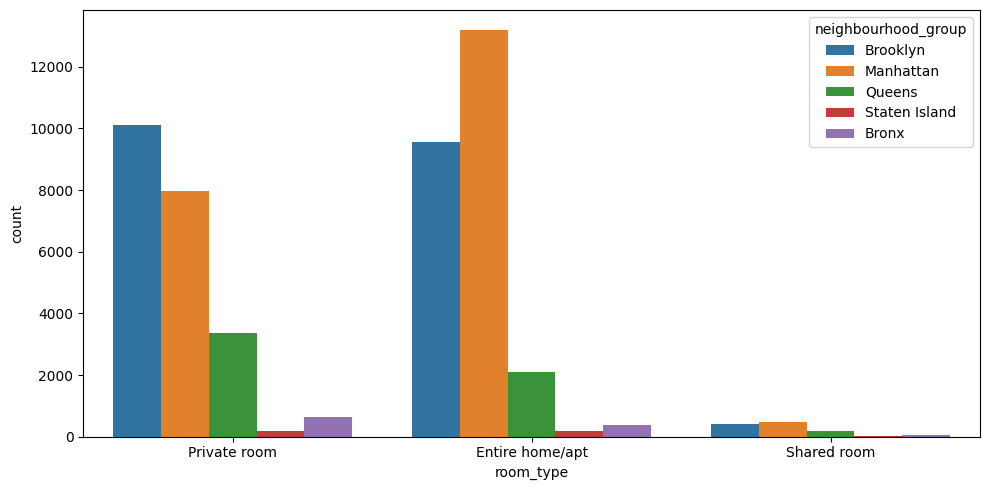

In [16]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.countplot(data = data, x = "room_type", hue = "neighbourhood_group")

plt.tight_layout()
plt.show()

De gráfico anterior podemos observar poco, pero quizá sí que ver gráficamente la predominancia de tipos de alojamientos por cada distrito, siendo más habitaciones privadas en Brooklyn y más aptos. enteros en Manhattan.

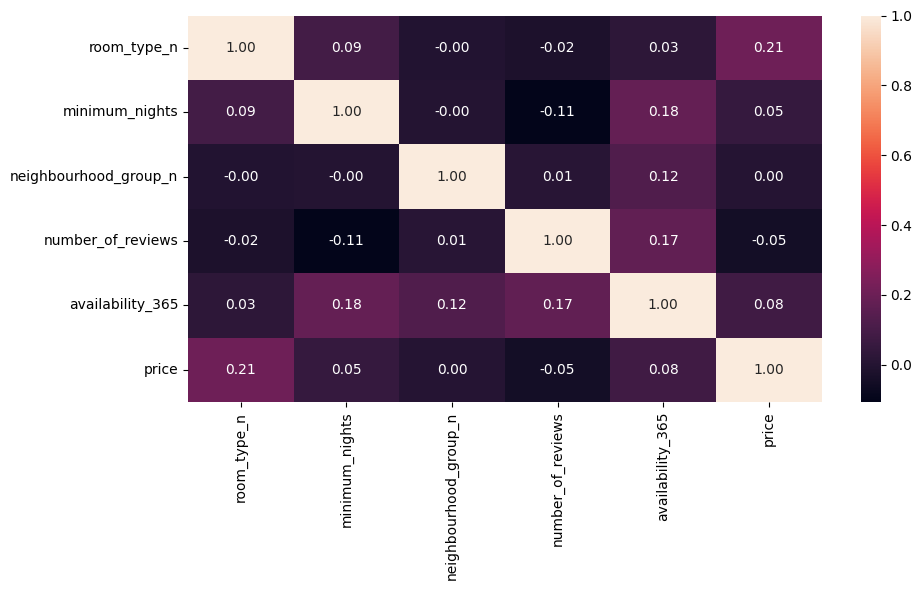

In [19]:
data["room_type_n"] = pd.factorize(data["room_type"])[0]
data["neighbourhood_group_n"] = pd.factorize(data["neighbourhood_group"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(data[["room_type_n", "minimum_nights", "neighbourhood_group_n", "number_of_reviews", "availability_365", "price"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

El análisis de correlaciones no refleja ninguna relación directa con el precio de los alojamientos que es nuestra principal variable. Es cierto, que el tipo de alojamientos nos da unos ratios de 0,2 pero entendiendo los distintos tipos ya podríamos saber que cada uno de ellos estaría en un rango diferente. Aún así pasamos a graficarlo a continuación para ver si existe relación clara. El resto de las correlaciones son débiles y no son tan significativas como para contemplarlas en el análisis.

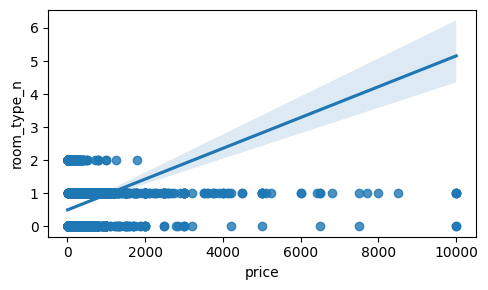

In [27]:
fig, axis = plt.subplots(figsize = (5,3))

sns.regplot(data = data, x = "price", y = "room_type_n")

plt.tight_layout()
plt.show()

In [29]:
data.query('price == 10000')

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,room_type_n,neighbourhood_group_n
9151,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0,0,2
17692,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0,1,0
29238,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,83,1,1


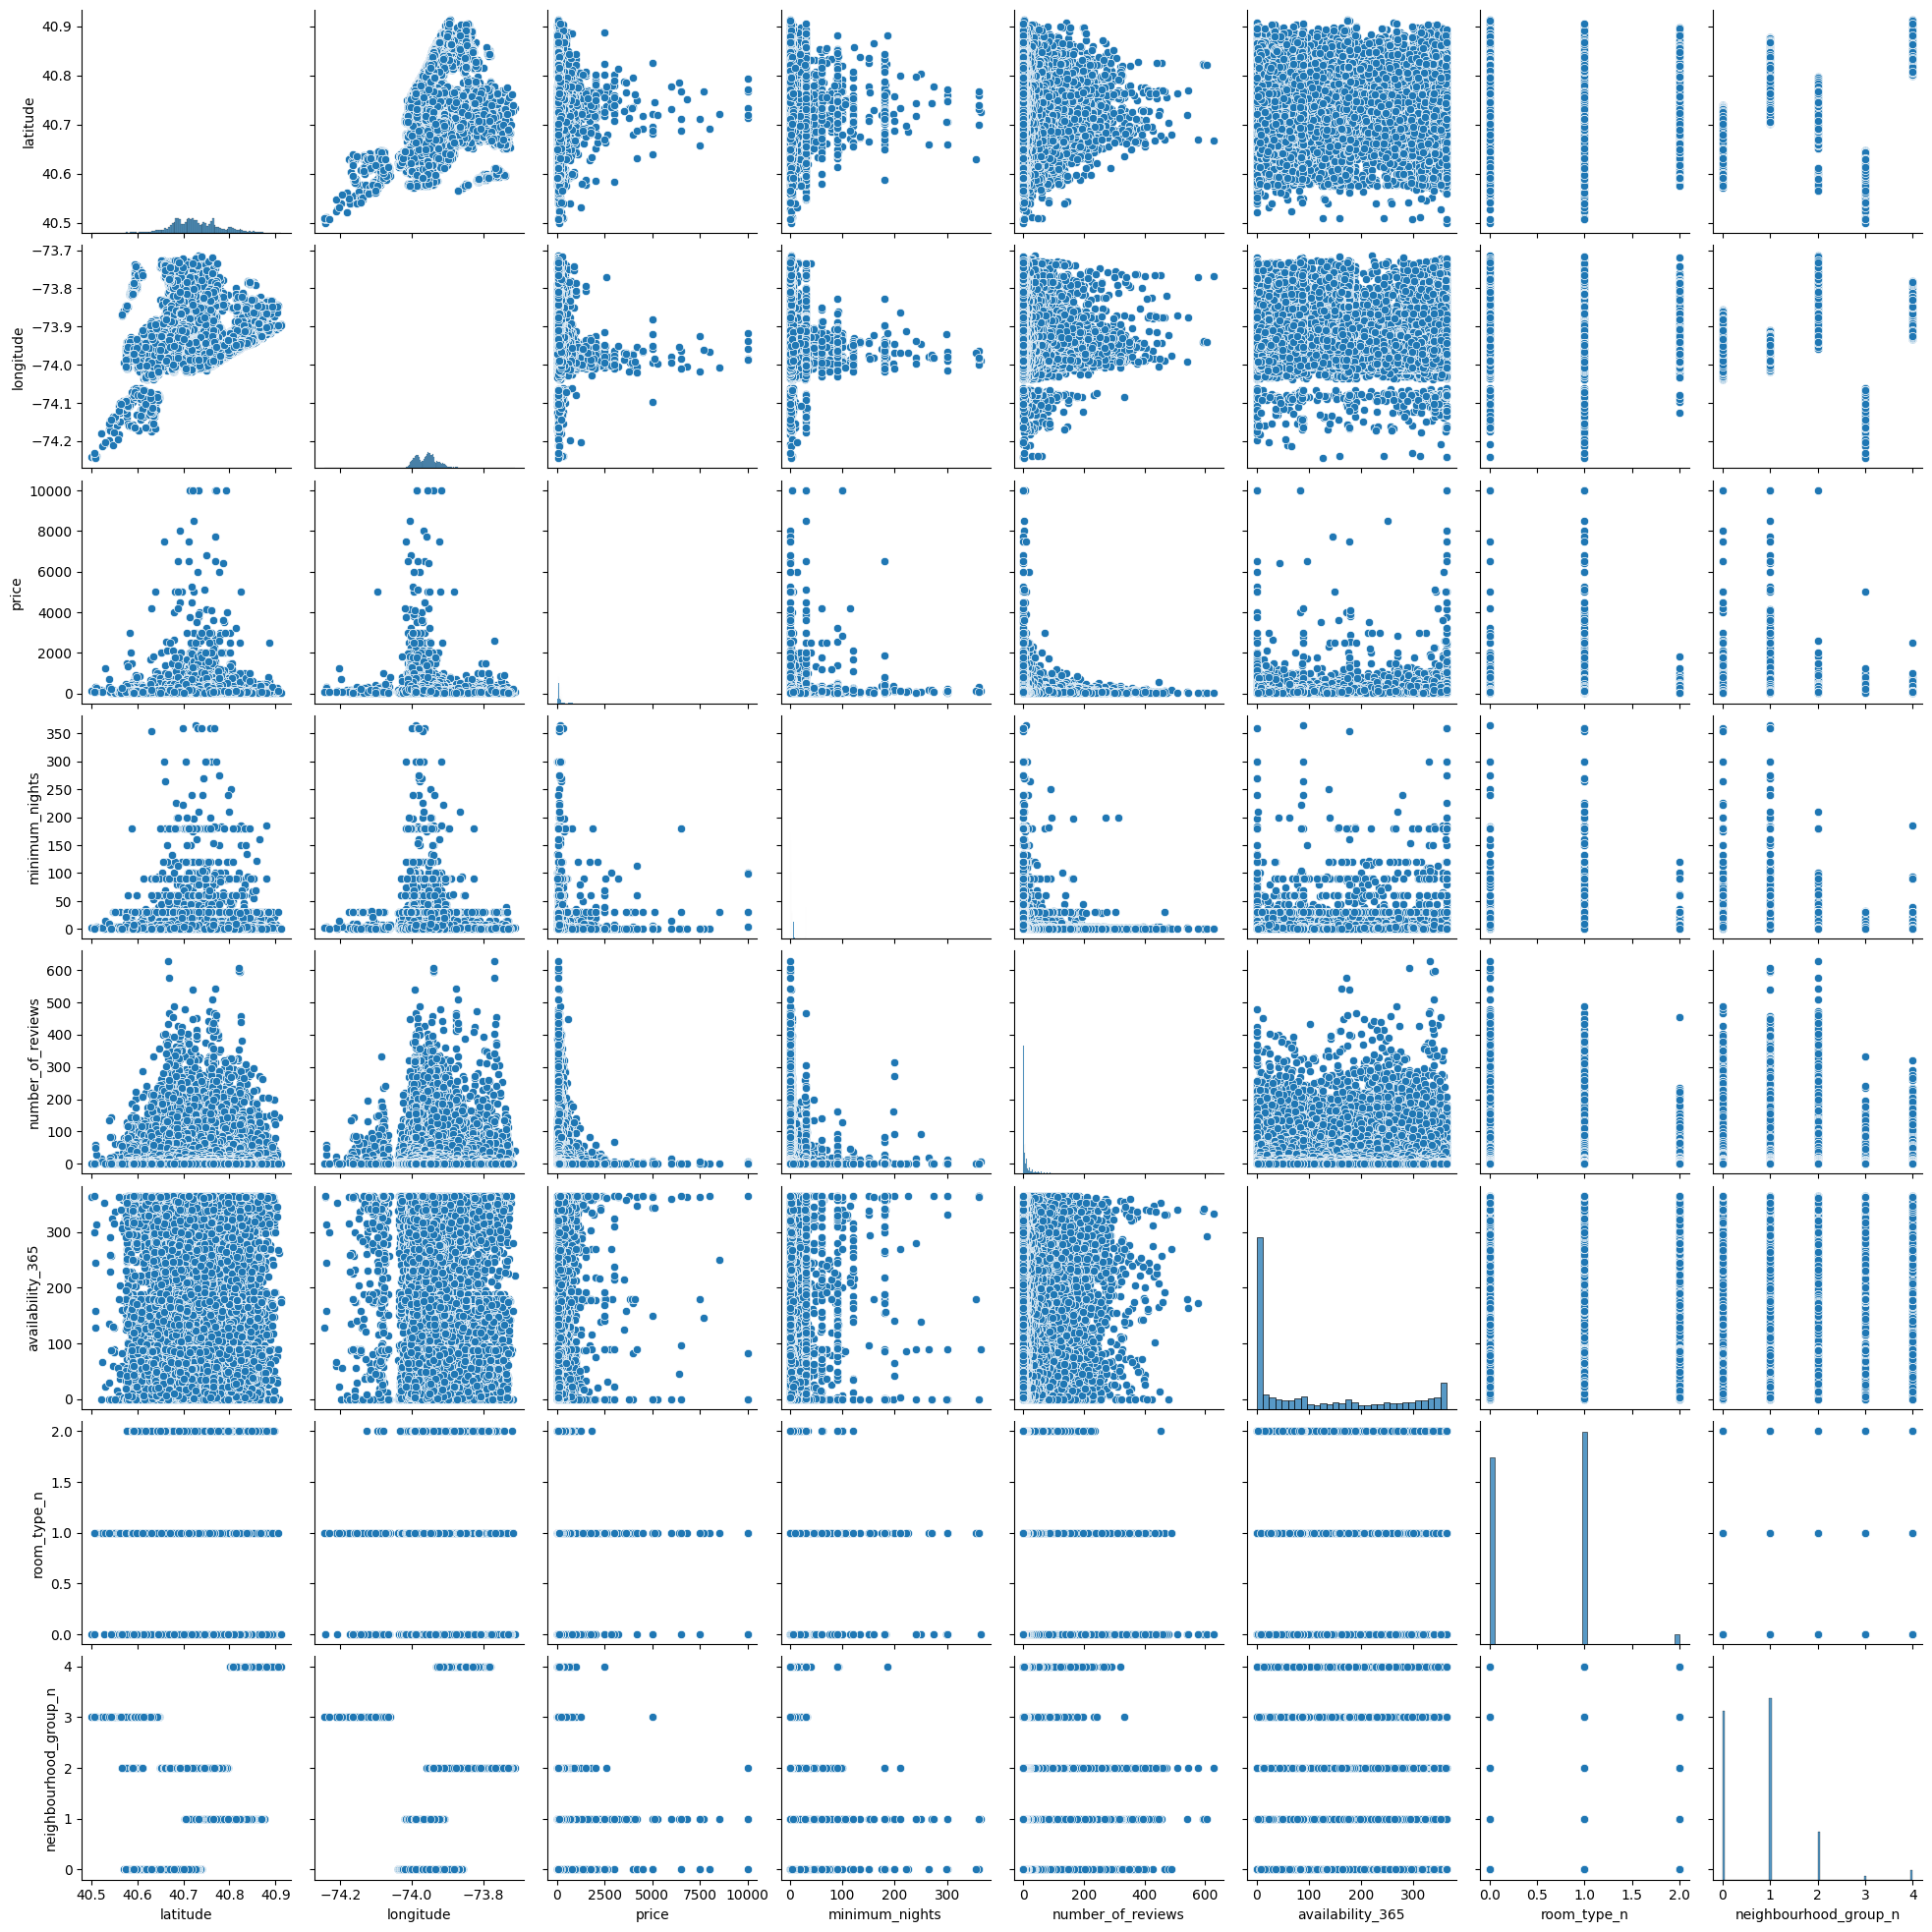

In [28]:
sns.pairplot(data = data)

***Ingeniería de características***

*Análisis de outliers*

In [31]:
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,room_type_n,neighbourhood_group_n
count,48841.000000,48841.000000,48841.000000,48841.000000,48841.000000,48841.000000,48841.000000,48841.000000
mean,40.728952,-73.952159,152.646752,6.627649,23.287566,112.655351,0.567003,0.786941
std,0.054533,0.046162,239.873537,13.951728,44.567243,131.549006,0.541198,0.844272
min,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,40.690090,-73.983070,69.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,40.723080,-73.955680,106.000000,3.000000,5.000000,45.000000,1.000000,1.000000
75%,40.763130,-73.936270,175.000000,5.000000,24.000000,226.000000,1.000000,1.000000
max,40.913060,-73.712990,10000.000000,364.000000,629.000000,365.000000,2.000000,4.000000


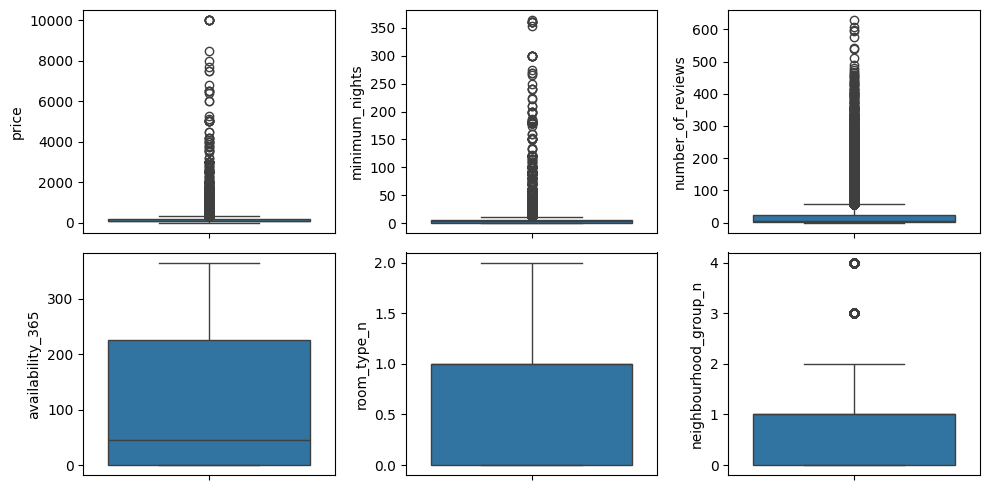

In [33]:
fig, axis = plt.subplots(2, 3, figsize = (10,5))

sns.boxplot(ax = axis[0, 0], data = data, y = "price")
sns.boxplot(ax = axis[0, 1], data = data, y = "minimum_nights")
sns.boxplot(ax = axis[0, 2], data = data, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 0], data = data, y = "availability_365")
sns.boxplot(ax = axis[1, 1], data = data, y = "room_type_n")
sns.boxplot(ax = axis[1, 2], data = data, y = "neighbourhood_group_n")

plt.tight_layout()

plt.show()

Podemos determinar fácilmente que las variables afectadas por outliers son precio, mínimo de noches y número de reseñas. Si bien es cierto que estamos con valores muy atípicos, no creo que sea correcto eliminar o modificar estos valores puesto que forman parte de nuestra muestra y ya hemos varificado anteriormente que no son erróneos.

**Escalado de valores**

*Normalización*

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48841 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   neighbourhood_group    48841 non-null  object 
 1   neighbourhood          48841 non-null  object 
 2   latitude               48841 non-null  float64
 3   longitude              48841 non-null  float64
 4   room_type              48841 non-null  object 
 5   price                  48841 non-null  int64  
 6   minimum_nights         48841 non-null  int64  
 7   number_of_reviews      48841 non-null  int64  
 8   availability_365       48841 non-null  int64  
 9   room_type_n            48841 non-null  int64  
 10  neighbourhood_group_n  48841 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.5+ MB


In [35]:
from sklearn.preprocessing import StandardScaler

data["neighbourhood_n"] = pd.factorize(data["neighbourhood"])[0]

num_variables = ["minimum_nights", "number_of_reviews", "availability_365", "room_type_n", "neighbourhood_group_n", "neighbourhood_n", "latitude" , "longitude"]

scaler = StandardScaler()
norm_features = scaler.fit_transform(data[num_variables])
total_data_norm = pd.DataFrame(norm_features, index = data.index, columns = num_variables)
total_data_norm["price"] = data["price"]
total_data_norm.head()

,minimum_nights,number_of_reviews,availability_365,room_type_n,neighbourhood_group_n,neighbourhood_n,latitude,longitude,price
0,-0.403370,-0.320588,1.918275,-1.047693,-0.932104,-0.861942,-1.493829,-0.437832,149
1,-0.403370,0.487189,1.842257,0.800080,0.252360,-0.833105,0.452348,-0.684792,225
2,-0.260017,-0.522532,1.918275,-1.047693,0.252360,-0.804267,1.468255,0.222245,150
3,-0.403370,5.535791,0.618366,0.800080,-0.932104,-0.775430,-0.803416,-0.164660,89
4,0.241718,-0.320588,-0.856384,0.800080,0.252360,-0.746593,1.275526,0.176969,80
